In [17]:
from pyathena import connect
import pandas as pd
import seaborn
import os

#environment vars
access_key = os.environ['AWS_ACCESS_KEY_ID']
secret_key = os.environ['AWS_SECRET_ACCESS_KEY']
staging = os.environ['AWS_S3_STAGING']
region = os.environ['AWS_REGION']

conn = connect(aws_access_key_id=access_key,
               aws_secret_access_key=secret_key,
               s3_staging_dir=staging,
               region_name=region)

In [18]:
stock_prices = pd.read_sql("select * from \"stock-price-db\".\"raw\" where symbol = 'GOOG'", conn)

In [19]:
stock_prices.tail(3)

,symbol,date,open,high,low,close,adjusted_close,volume
3760,GOOG,2019-07-29,1241.050049,1247.369995,1228.229980,1239.410034,1239.410034,2223700
3761,GOOG,2019-07-30,1225.410034,1234.869995,1223.300049,1225.140015,1225.140015,1453300
3762,GOOG,2019-07-31,1223.000000,1234.000000,1207.764038,1216.680054,1216.680054,1712600


## Plot Daily Close Price

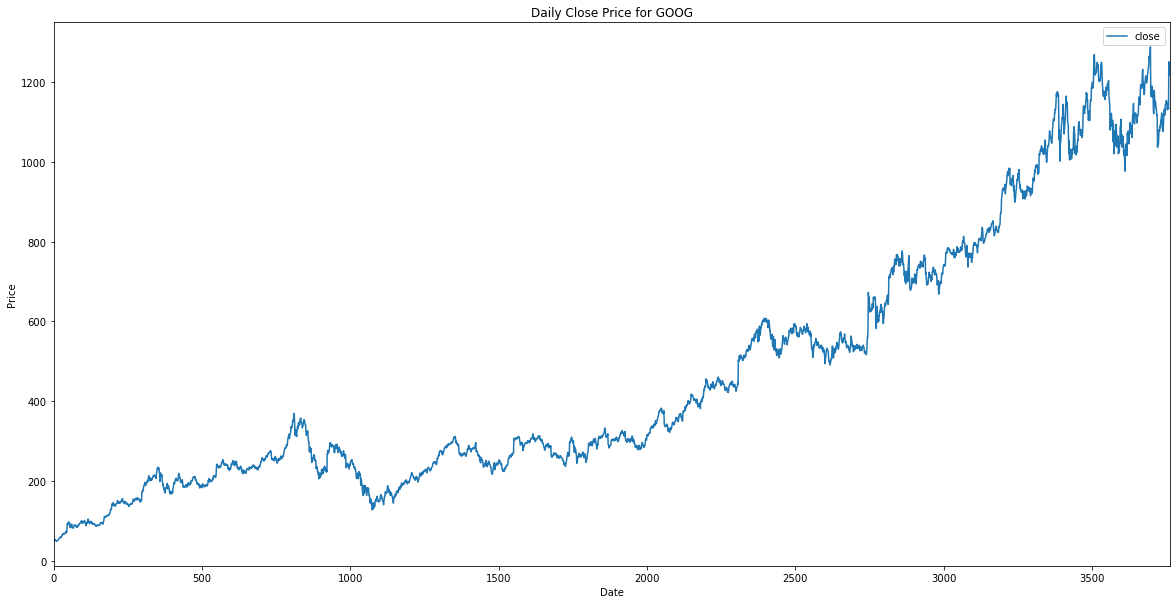

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
df_prices = pd.DataFrame(stock_prices, columns=['close'])
df_prices.plot(title='Daily Close Price for GOOG', figsize=(20,10), kind='line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

import math as math
stock_prices['price_range']=stock_prices['high_price'] - stock_prices['low_price']
df_ranges = pd.DataFrame(stock_prices, columns=['price_range'])
df_ranges.plot(title="Daily Price Range for GOOG", figsize=(20,10), kind='line')
plt.xlabel('Date')
plt.ylabel('Range')
plt.show()

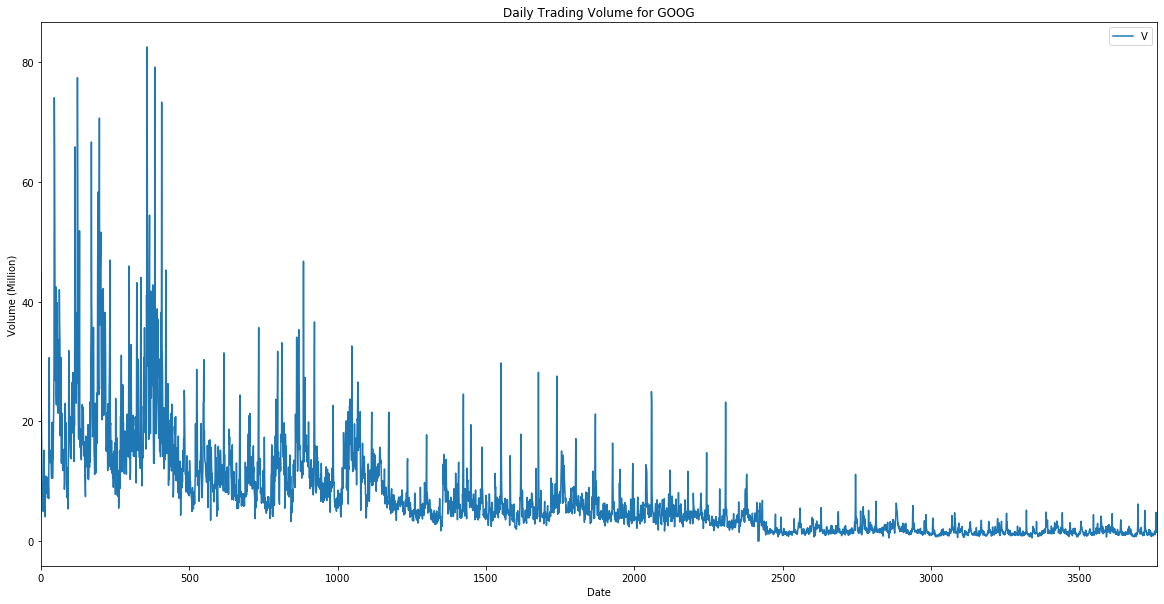

In [21]:
stock_prices['V']=stock_prices['volume']/1000000.0
df_volume = pd.DataFrame(stock_prices, columns=['V'])
df_volume.plot(title='Daily Trading Volume for GOOG', figsize=(20,10), kind='line')
plt.xlabel('Date')
plt.ylabel('Volume (Million)')
plt.show()

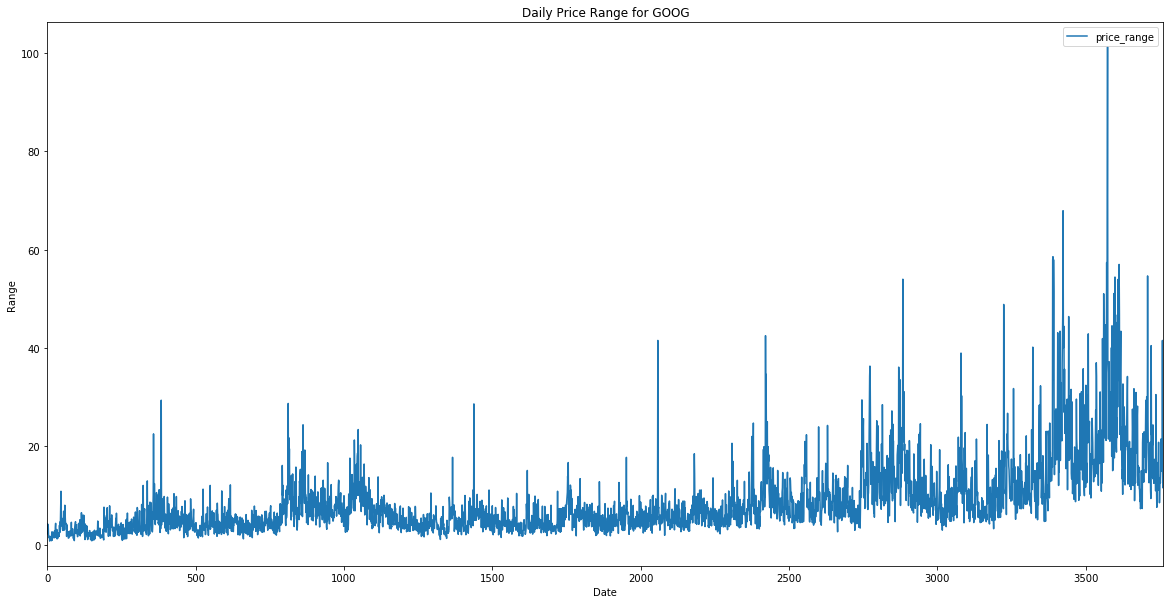

In [22]:
import math as math
stock_prices['price_range']=stock_prices['high'] - stock_prices['low']
df_ranges = pd.DataFrame(stock_prices, columns=['price_range'])
df_ranges.plot(title="Daily Price Range for GOOG", figsize=(20,10), kind='line')
plt.xlabel('Date')
plt.ylabel('Range')
plt.show()